Installation


In [1]:
!pip install transformers
!pip install dice_ml
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.8 MB/s eta 0:00:00


In [2]:
gpt2 = AutoModelForCausalLM.from_pretrained("gpt2", return_dict_in_generate=True)
tokenizer = AutoTokenizer.from_pretrained("gpt2")


Generating GPT-2 response for different inputs


In [6]:
input_text = "what is cloud computing"
torch.manual_seed(2)
tokens = tokenizer(input_text, return_tensors="pt").input_ids

# Produce 3 responses and get the highest probability value
generated_outputs = gpt2.generate(tokens, do_sample=True, num_return_sequences=3, output_scores=True)
gen_sequences = generated_outputs.sequences
scores = generated_outputs.scores[0]  # Extract the scores tensor from the tuple

# Convert scores to probabilities
probs = scores.softmax(dim=-1)

# Print responses and their probabilities
for i, response in enumerate(gen_sequences):
    decoded_text = tokenizer.decode(response, skip_special_tokens=True)
    response_probs = probs[i]

    print(f"Response {i+1}: {decoded_text}")

    for token_id, prob in zip(response, response_probs):
        token = tokenizer.decode(token_id)
        print(f"Token: {token}, Probability: {prob.item()}")

    print("\n")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Response 1: what is cloud computing?

Cloud computing is a new or open-source project with a massive
Token: what, Probability: 0.0
Token:  is, Probability: 0.003922979347407818
Token:  cloud, Probability: 0.0
Token:  computing, Probability: 0.0
Token: ?, Probability: 0.0
Token: 
, Probability: 0.0
Token: 
, Probability: 0.0
Token: Cloud, Probability: 0.0
Token:  computing, Probability: 0.03917313739657402
Token:  is, Probability: 0.0
Token:  a, Probability: 0.0
Token:  new, Probability: 0.06540276110172272
Token:  or, Probability: 0.0
Token:  open, Probability: 0.0023901965469121933
Token: -, Probability: 0.0
Token: source, Probability: 0.0
Token:  project, Probability: 0.0
Token:  with, Probability: 0.0
Token:  a, Probability: 0.0
Token:  massive, Probability: 0.0


Response 2: what is cloud computing?" You wonder," he says. (The computer operating system is called a cloud
Token: what, Probability: 0.0
Token:  is, Probability: 0.003922979347407818
Token:  cloud, Probability: 0.0
Token

In [7]:
prompts =  ["what is computing", "what is cloud computing",
           "how cloud computing works", "how is cloud formed",
           "what is cloud", "what is data", "where to park",
           "how is data formed", "what is park", "how to park", "what to park",
           "where data is formed", "what is work", "when to work"]
input_word_list = []
prob_list = []
for input_text in prompts:
  torch.manual_seed(2)
  tokens = tokenizer(input_text, return_tensors="pt").input_ids
  # Produce 3 responses and get the highest probability value
  generated_outputs = gpt2.generate(tokens, do_sample=True, num_return_sequences=3, output_scores=True)
  responses = generated_outputs.sequences[:, tokens.shape[-1]:]

  # Get probabilities and token IDs
  probability = torch.stack(generated_outputs.scores, dim=1).softmax(-1)
  gen_probs = torch.gather(probability, 2, responses[:, :, None]).squeeze(-1)
  gen_tokens = responses.tolist()
  unnormd_prob = gen_probs.prod(-1)

  # Normalize the probability over the three sequences
  normed_prob = gen_probs / gen_probs.sum(0)

  normed_prob_sequence = normed_prob.prod(-1)
  # Calculate cumulative probabilities for each sentence
  print("Prompt: ", input_text,"\n")
  # Print labeled sentences
  for i, probability in enumerate(normed_prob_sequence):
      decoded_text = tokenizer.decode(gen_tokens[i])
      print(f"Sentence {i+1}: {decoded_text}\nProbability: {probability}\n")
  input_word_list.append(tokens.tolist())
  prob_list.append(normed_prob_sequence)
  print("\n\n")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is computing 

Sentence 1: ?

Yes, computing is the most fundamental domain of knowledge, but it's
Probability: 4.1008045847945596e-09

Sentence 2: ?" You wonder," he says. (The words fall in line alongside a phrase "
Probability: 1.1756184549052312e-22

Sentence 3: ?" It's very different from a lot of programming languages like Java or C, but
Probability: 2.218623895711147e-11






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is cloud computing 

Sentence 1: ?

Cloud computing is a new or open-source project with a massive
Probability: 3.1016969548325335e-10

Sentence 2: ?" You wonder," he says. (The computer operating system is called a cloud
Probability: 3.791606999891172e-17

Sentence 3: ?" It's very different from Microsoft and Google; it's not a full-
Probability: 1.6282842316226592e-13






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  how cloud computing works 

Sentence 1:  well for you or me as well, or will benefit you for some other reason
Probability: 3.708064603524623e-15

Sentence 2: ?" You wonder," he says. (The computer system in question is a Microsoft
Probability: 2.969835031850414e-18

Sentence 3: , you can really use it that way."

"I'm not a
Probability: 6.426800758241313e-10






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  how is cloud formed 

Sentence 1: ?

Yes, as it may or may not be for some such case
Probability: 1.1457376714041345e-10

Sentence 2: ?" You wonder," he says. (The words have the same feeling, so
Probability: 1.0271236496510791e-17

Sentence 3:  in these instances? Did the clouds and clouds go apart under such a sun's
Probability: 8.476882397355648e-18






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is cloud 

Sentence 1:  storage for?

Cloud storage, or "crapphire" as I
Probability: 1.6921382697820953e-11

Sentence 2: ?" You wonder," he says. (The words fall silent for a moment and then
Probability: 7.164456792527578e-17

Sentence 3: y?" asked the chief.

Another one who spoke in Spanish said, "
Probability: 2.948753776419767e-14






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is data 

Sentence 1:  storage for?

Data storage, or "crawling for data", is not
Probability: 1.2501157886646297e-09

Sentence 2: ?" You wonder," he says. (The words have the same feeling, so "
Probability: 7.320495171342362e-19

Sentence 3:  science?" asked the chief economist at Peking University who spoke last December while visiting the
Probability: 3.0921121787204527e-18






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  where to park 

Sentence 1:  your vehicle, or to get your favorite craft beer or hot dog at such a convenient
Probability: 3.847938118720041e-15

Sentence 2:  or move it," he said. (The park is the same size as a regular
Probability: 3.1593668246886544e-15

Sentence 3:  your car and what kind of music your car will sound like. It's up to
Probability: 7.870796236986166e-10






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  how is data formed 

Sentence 1: ?

Yes, as long as it will be an event with a good
Probability: 2.936161383471081e-11

Sentence 2: ?" You wonder," he says. (The words fall in line alongside a phrase
Probability: 1.5190816520366897e-20

Sentence 3:  in these instances? Did the data and methods of these systems not exist while the
Probability: 2.3556208609290747e-15






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is park 

Sentence 1:  property] and what constitutes a right, or what is an equitable right or an injustice
Probability: 4.398976673105747e-16

Sentence 2: ?" You wonder," he says. (The words have the same feeling, so "
Probability: 3.665525272629082e-21

Sentence 3: our?" asked the young man.

"Yeah," agreed Grant. "Don
Probability: 7.769529464241032e-10






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  how to park 

Sentence 1:  your vehicle on public land as well as avoid passing by parking lots with other vehicles on
Probability: 3.437749759339914e-13

Sentence 2:  a taxi in your local area. (The taxi costs the same cost as your regular
Probability: 5.561985096937897e-15

Sentence 3:  your bike in the same conditions that your car will be under because of such a low
Probability: 2.2593732440512326e-13






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what to park 

Sentence 1:  next).

We've also got our top teams to play with such as:
Probability: 1.513545690688678e-13

Sentence 2:  or what to look out for. (The park is the same size as your regular
Probability: 1.955244473272888e-11

Sentence 3:  in your own backyard) and that your kids go without school because of what's happening
Probability: 1.320038252561025e-14






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  where data is formed 

Sentence 1: , there can be very high risk that data will be corrupted for some other reason
Probability: 7.953525533489769e-13

Sentence 2:  or is extracted," he said. (The data is the same as a typical
Probability: 1.5060598379645755e-15

Sentence 3:  in these instances, even if there are no references to the data to be extracted
Probability: 4.068451305017096e-12






The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt:  what is work 

Sentence 1:  done for you?)

Do you have specific examples of how you'll use your
Probability: 4.98998231623915e-10

Sentence 2: ?" You wonder," he says. (The words have the same feeling, so "
Probability: 6.302426088830472e-20

Sentence 3:  in these categories? Did it not end up leading to higher productivity? Do we really
Probability: 1.5363557712681384e-15




Prompt:  when to work 

Sentence 1:  on building the website).

4. A free to play game such as Heroes
Probability: 2.5578953357003643e-14

Sentence 2:  or just work," he said. (The company declined the comment.) "It's
Probability: 1.144646850177386e-13

Sentence 3:  on your next project) and that your job will actually help you to live up to
Probability: 2.1704008382195106e-11






In [8]:
import pandas as pd
df = pd.DataFrame(input_word_list)
df

,0
0,"[10919, 318, 14492]"
1,"[10919, 318, 6279, 14492]"
2,"[4919, 6279, 14492, 2499]"
3,"[4919, 318, 6279, 7042]"
4,"[10919, 318, 6279]"
5,"[10919, 318, 1366]"
6,"[3003, 284, 3952]"
7,"[4919, 318, 1366, 7042]"
8,"[10919, 318, 3952]"
9,"[4919, 284, 3952]"


In [9]:
unique_elements = set()
for index, row in df.iterrows():
    for each_entry in row:
      unique_elements.update(each_entry)
unique_elements = list(unique_elements)
result_data = {element: [] for element in unique_elements}
for element in result_data:
    for i, each_row in df.iterrows():
      result_data[element].append(each_row.tolist()[0].count(element) if element in each_row.tolist()[0] else 0)
result_df = pd.DataFrame(result_data)
unique_words = [tokenizer.decode(i) for i in unique_elements]
result_df.columns = unique_words
target = [float(max(i)) for i in prob_list]
result_df['target'] = target
result_df

,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,0,0,0,0,1,0,0,0,0,0,0,1,1,4.100805e-09
1,0,0,0,1,1,0,0,0,0,0,0,1,1,3.101697e-10
2,0,1,0,1,0,0,0,0,0,1,0,1,0,6.426801e-10
3,1,0,0,1,0,0,0,0,0,1,0,0,1,1.145738e-10
4,0,0,0,1,1,0,0,0,0,0,0,0,1,1.692138e-11
5,0,0,0,0,1,0,0,0,1,0,0,0,1,1.250116e-09
6,0,0,0,0,0,0,1,1,0,0,1,0,0,7.870796e-10
7,1,0,0,0,0,0,0,0,1,1,0,0,1,2.936161e-11
8,0,0,0,0,1,0,1,0,0,0,0,0,1,7.769529e-10
9,0,0,0,0,0,0,1,1,0,1,0,0,0,3.437750e-13


Visualize dataframe for probability values

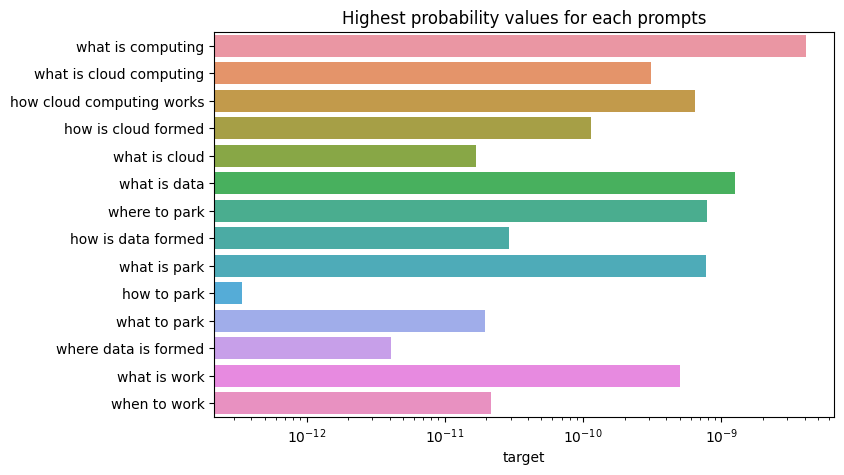

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.title(f'Highest probability values for each prompts')
plt.xscale('log')
sns.barplot(y = prompts, x = result_df['target'])
plt.show()

Setting threshold to perform classification


In [12]:
#Setting threshold
threshold = 1.01e-10
result_df['target'] = result_df['target'].apply(lambda x: 1 if x > threshold else 0)
result_df

,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,0,0,0,1,1,0,0,0,0,0,0,1,1,1
2,0,1,0,1,0,0,0,0,0,1,0,1,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0,1,1
4,0,0,0,1,1,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,1,0,0,0,1,1
6,0,0,0,0,0,0,1,1,0,0,1,0,0,1
7,1,0,0,0,0,0,0,0,1,1,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,0,0,1,1
9,0,0,0,0,0,0,1,1,0,1,0,0,0,0


Visualizing word count

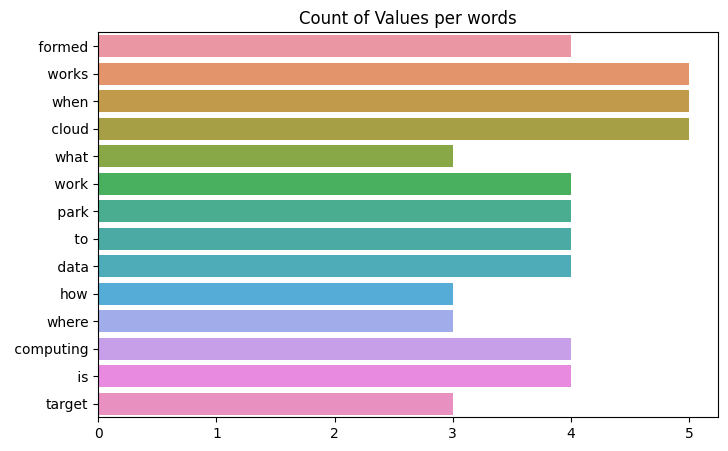

In [13]:
count_per_word = result_df.sum(axis = 1)
plt.figure(figsize=(8, 5))  # Set figure size
plt.title(f'Words count')  # Set title
sns.barplot(x = count_per_word, y = result_df.columns)
plt.show()

Integrating Dice_ml

In [14]:
from dice_ml import Dice
from dice_ml.utils import helpers
import dice_ml
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/dice_ml/utils/exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "


Creating pipeline and fitting the model

In [16]:
import numpy as np
x = result_df.drop(columns=['target'])
y = result_df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=27)
w0 = sum(y==0)/np.bincount(y).sum()
w1 = sum(y==1)/np.bincount(y).sum()
rf_params = {
    'n_estimators': 10,
    'max_depth': 10,
    'n_jobs': -1,
    'class_weight': {0:w0, 1:w1},
    'random_state': 27
}
clf_rf = Pipeline(steps=[('classifier', RandomForestClassifier(**rf_params))])
rf_model = clf_rf.fit(x_train, y_train)

Generating counterfactuals

In [17]:
data = dice_ml.Data(dataframe=result_df, continuous_features = unique_words, outcome_name='target')
model_exp = dice_ml.Model(model=rf_model, backend ='sklearn')
exp = dice_ml.Dice(data, model_exp, method="random")
e1 = exp.generate_counterfactuals(x_train[10:12], total_CFs=1, desired_class="opposite")
#Show counterfactual explanations
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

Query instance (original outcome : 1)


,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,0,0,0,0,1,1,0,0,0,0,0,0,1,1



Diverse Counterfactual set (new outcome: 0.0)


,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,-,-,-,-,-,0,-,-,-,-,1,-,-,0


Query instance (original outcome : 1)


,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,0,0,0,0,1,0,1,0,0,0,0,0,1,1



Diverse Counterfactual set (new outcome: 0.0)


,formed,works,when,cloud,what,work,park,to,data,how,where,computing,is,target
0,-,-,-,-,-,-,0,-,-,-,1,-,-,0
